# 3.2 Introduction to Keras

Keras is a
deep-learning framework for Python that provides a convenient way to define and
train almost any kind of deep-learning model. Keras was initially developed for
researchers, with the aim of enabling fast experimentation.

## 3.2.1 Keras, TensorFlow, Theano, and CNTK

Keras is a model-level library, providing high-level building blocks for developing
deep-learning models. It doesn’t handle low-level operations such as tensor manipulation
and differentiation. Instead, it relies on a specialized, well-optimized tensor
library to do so, serving as the backend engine of Keras. Rather than choosing a single
tensor library and tying the implementation of Keras to that library, Keras handles the
problem in a modular way (see figure below); thus several different backend engines can
be plugged seamlessly into Keras. Currently, the three existing backend implementations
are the TensorFlow backend, the Theano backend, and the Microsoft Cognitive
Toolkit (CNTK) backend. In the future, it’s likely that Keras will be extended to work
with even more deep-learning execution engines.

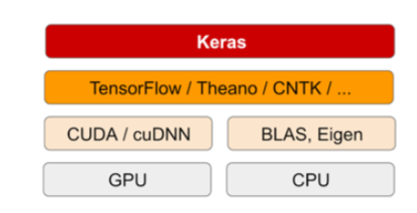

TensorFlow, CNTK, and Theano are some of the primary platforms for deep learning
today. Theano (http://deeplearning.net/software/theano) is developed by the MILA
lab at Université de Montréal, TensorFlow (www.tensorflow.org) is developed by Google,
and CNTK (https://github.com/Microsoft/CNTK) is developed by Microsoft. Any
piece of code that you write with Keras can be run with any of these backends without
having to change anything in the code: you can seamlessly switch between the two
during development, which often proves useful—for instance, if one of these backends
proves to be faster for a specific task. We recommend using the TensorFlow backend as
the default for most of your deep-learning needs, because it’s the most widely adopted,
scalable, and production ready.

Via TensorFlow (or Theano, or CNTK), Keras is able to run seamlessly on both
CPUs and GPUs. When running on CPU, TensorFlow is itself wrapping a low-level
library for tensor operations called Eigen (http://eigen.tuxfamily.org). On GPU,
TensorFlow wraps a library of well-optimized deep-learning operations called the
NVIDIA CUDA Deep Neural Network library (cuDNN).

## 3.2.2 Developing with Keras: a quick overview

The typical Keras workflow looks just like that example:
1. Define your training data: input tensors and target tensors.
2. Define a model that maps your inputs to your targets.
3. Configure the learning process by choosing a loss function, an optimizer, and some metrics to monitor.
4. Iterate on your training data by calling the fit() method of your model.

(2) => There are __two ways__ to define a model:
* using the Sequential class (only for linear stacks of layers, which is the most common network architecture by far)
* or the functional API (for directed acyclic graphs of layers, which lets you build completely arbitrary architectures).

As a refresher, here’s a two-layer model defined using the Sequential class :

In [1]:
# Sequential class

from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784,)))
model.add(layers.Dense(10, activation='softmax'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


And here’s the same model defined using the functional API:

In [2]:
# Functional API

input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = models.Model(inputs=input_tensor, outputs=output_tensor)

With the functional API, you’re manipulating the data tensors that the model processes
and applying layers to this tensor as if they were functions.

(3) => Once your model architecture is defined, it __doesn’t matter__ whether you used a Sequential model or the functional API. All of the following steps are the same.

The learning process is __configured in the compilation step__, where you __specify__ the
__optimizer__ and __loss function(s)__ that the model should use, as well as the __metrics__ you
want to monitor during training. Here’s an example with a single loss function, which
is by far the most common case:

In [3]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='mse', metrics=['accuracy'])

(4) => Finally, the learning process consists of passing Numpy arrays of input data (and the
corresponding target data) to the model via the fit() method, similar to what you
would do in Scikit-Learn and several other machine-learning libraries:

In [ ]:
model.fit(input_tensor, target_tensor, batch_size=128, epochs=10)

Over the next few chapters, you’ll build a solid intuition about what type of network
architectures work for different kinds of problems, how to pick the right learning configuration,
and how to tweak a model until it gives the results you want to see. We’ll
look at three basic examples in sections 3.4, 3.5, and 3.6: a two-class classification
example, a many-class classification example, and a regression example.